In [198]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\\s+', header=None)
    return data

def convert_to_binary_matrix(data):
    nucleobase_data = data.iloc[:, 3:]
    modes = nucleobase_data.mode(axis=0).iloc[0]
    binary_matrix = (nucleobase_data != modes).astype(int)

    return binary_matrix

def perform_pca(binary_matrix, n_components):
    centered_data = binary_matrix - binary_matrix.mean(axis=0)

    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(centered_data)

    return pca, transformed_data

def get_population_info(info_filename):
    population_info = {}

    with open(info_filename, 'r') as file:
        for line in file:
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                code, description = parts
                population_info[code] = code + ": " + description.split(':')[1]

    return population_info



In [200]:
data_file = 'p4dataset2023.txt'  

data = load_data(data_file)
print("Dataset shape:", data.shape)

binary_matrix = convert_to_binary_matrix(data)
print("Binary matrix shape:", binary_matrix.shape)


Dataset shape: (995, 10104)
Binary matrix shape: (995, 10101)


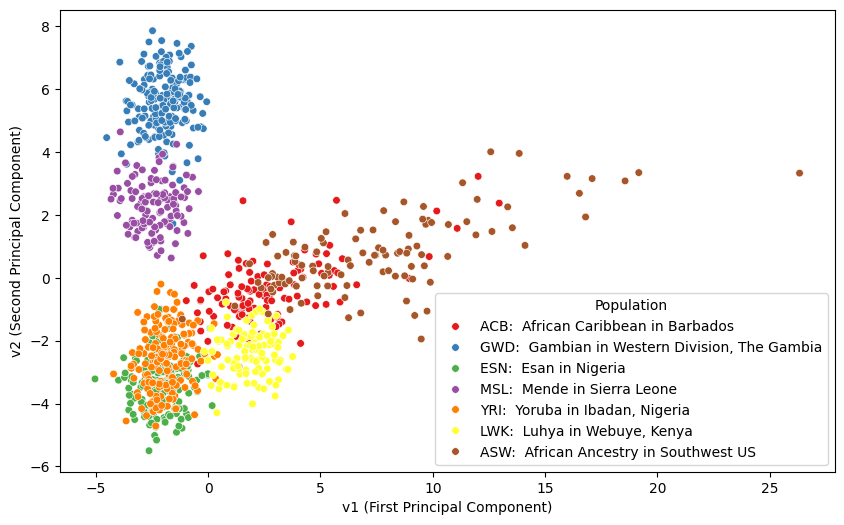

In [201]:
n_components = 2
pca, transformed_data = perform_pca(binary_matrix, n_components)

df_projected = pd.DataFrame(transformed_data, columns=['v1', 'v2'])
df_projected['population'] = data.iloc[:, 2]  

population_info = get_population_info('p4dataset2023_decoding.txt')

df_projected['Full Description'] = df_projected['population'].map(population_info)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_projected, x='v1', y='v2', hue='Full Description', palette='Set1', s=30)

plt.xlabel('v1 (First Principal Component)')
plt.ylabel('v2 (Second Principal Component)')
plt.legend(title='Population')
plt.show()

In [202]:
pca_3, transformed_data_3 = perform_pca(binary_matrix, 3)

print("Principal components shape:", transformed_data_3.shape)

Principal components shape: (995, 3)


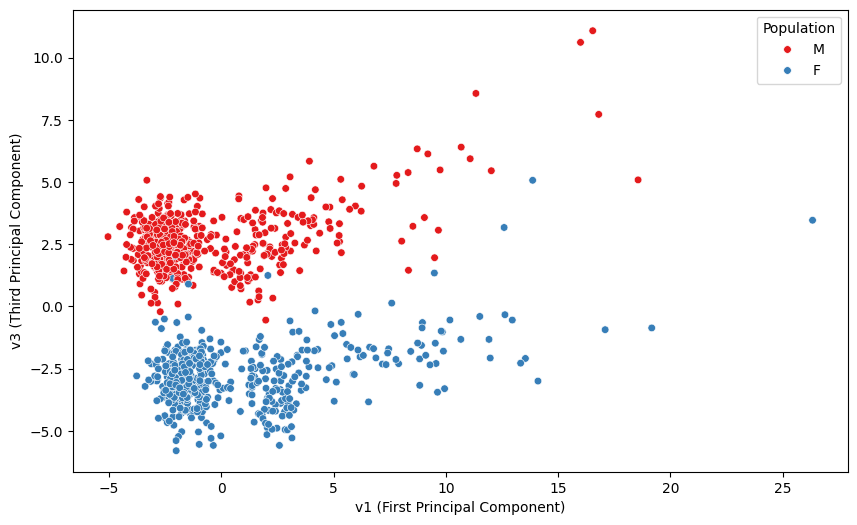

In [203]:
df_projected_3 = pd.DataFrame(transformed_data_3[:,[0,2]], columns=['v1', 'v3'])
df_projected_3['Sex'] = data.iloc[:, 1]
df_projected_3['Population'] = data.iloc[:, 2]


df_projected_3['Full Description'] = df_projected_3['Population'].map(population_info)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_projected_3, x='v1', y='v3', hue='Sex', palette='Set1', s=30)
plt.xlabel('v1 (First Principal Component)')
plt.ylabel('v3 (Third Principal Component)')
plt.legend(title='Population')
plt.show()

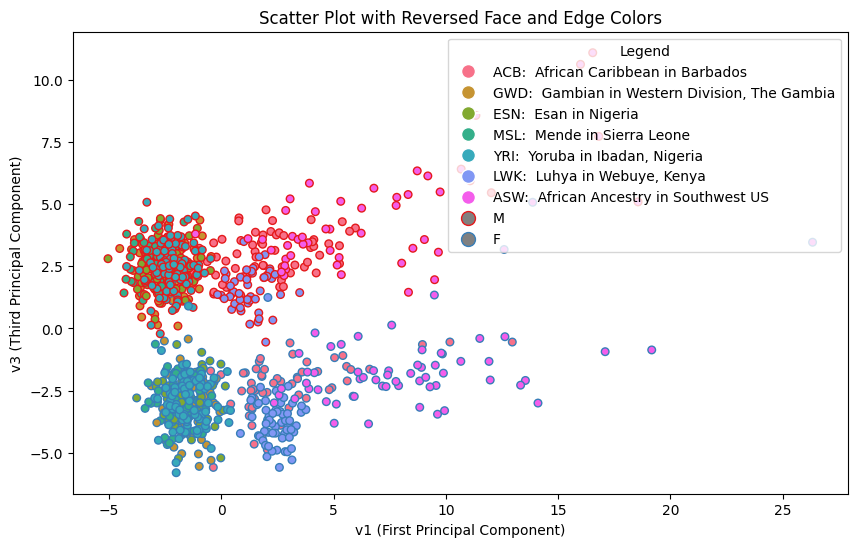

In [204]:
from matplotlib.lines import Line2D

# Map unique values in "Sex" to edge colors
unique_sex = df_projected_3['Sex'].unique()
edge_color_map = dict(zip(unique_sex, sns.color_palette('Set1', len(unique_sex))))
df_projected_3['Edge Color'] = df_projected_3['Sex'].map(edge_color_map)

# Map unique values in "Full Description" to face colors
unique_descriptions = df_projected_3['Full Description'].unique()
face_color_map = dict(zip(unique_descriptions, sns.color_palette('husl', len(unique_descriptions))))
df_projected_3['Face Color'] = df_projected_3['Full Description'].map(face_color_map)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with swapped roles for face and edge colors
plt.scatter(
    x=df_projected_3['v1'], 
    y=df_projected_3['v3'], 
    c=df_projected_3['Face Color'],  # Face colors for Full Description
    edgecolors=df_projected_3['Edge Color'],  # Edge colors for Sex
    s=30, 
    linewidth=1
)

# Add legend for edge colors (Sex)
sex_legend = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor=color, markerfacecolor='gray', markersize=10, label=sex) 
    for sex, color in edge_color_map.items()
]

# Add legend for face colors (Full Description)
description_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgewidth=1, markersize=10, label=desc) 
    for desc, color in face_color_map.items()
]

plt.legend(handles=description_legend + sex_legend, title="Legend", loc='best')

plt.xlabel('v1 (First Principal Component)')
plt.ylabel('v3 (Third Principal Component)')
plt.title('Scatter Plot with Reversed Face and Edge Colors')
plt.show()


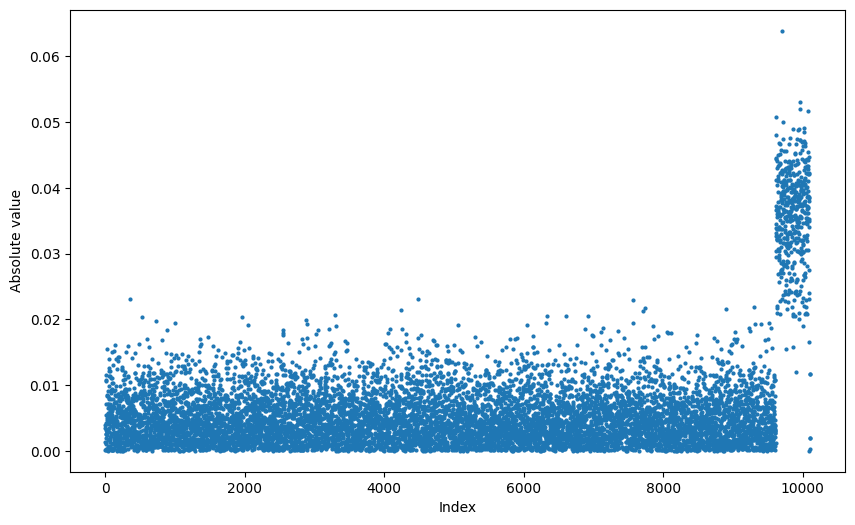

In [205]:
principal_components_3 = pca_3.components_
# print(principal_components_3[2,:].shape)

# Extract the third row of principal_components_3
third_principal_component = principal_components_3[2, :]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(np.abs(third_principal_component), marker='o', linestyle='None', markersize=2)  # Smaller markers for 10,000 points
plt.xlabel('Index')
plt.ylabel('Absolute value')
# plt.title('Plot of third principal component')
plt.show()

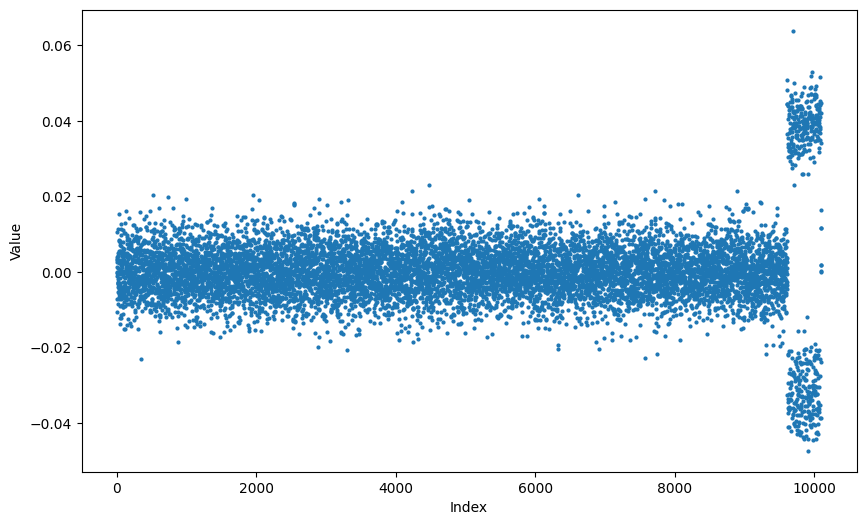

In [206]:
principal_components_3 = pca_3.components_
# print(principal_components_3[2,:].shape)

# Extract the third row of principal_components_3
third_principal_component = principal_components_3[2, :]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(third_principal_component, marker='o', linestyle='None', markersize=2)  # Smaller markers for 10,000 points
plt.xlabel('Index')
plt.ylabel('Value')
# plt.title('Plot of third principal component')
plt.show()

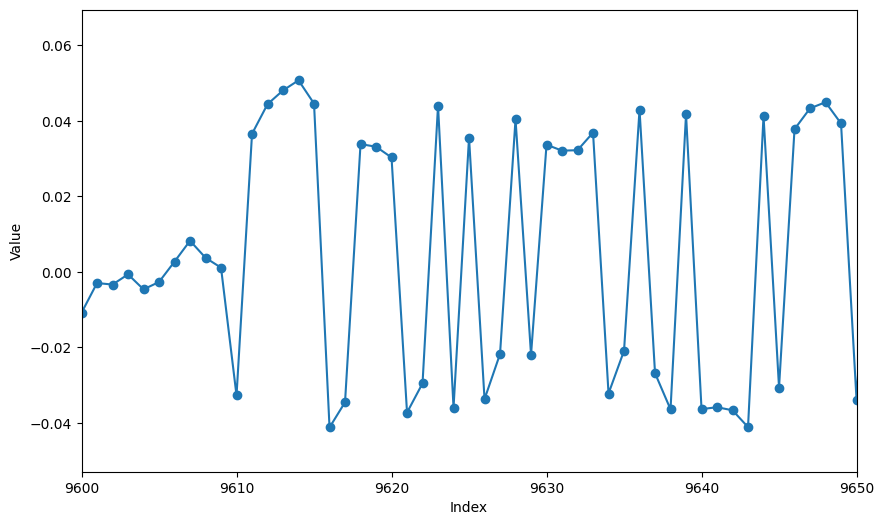

In [207]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(third_principal_component, marker='o')  # Smaller markers for 10,000 points
plt.xlabel('Index')
plt.ylabel('Value')
plt.xlim([9600,9650])
# plt.title('Plot of third principal component')
plt.show()

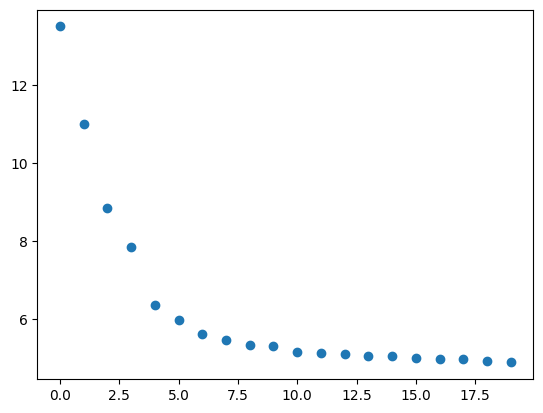

In [208]:
pca_play, _ = perform_pca(binary_matrix, 20)

plt.plot(pca_play.explained_variance_, marker = "o", linestyle='None')
plt.show()